# Fys1120 Lab

\<Skriv navn på gruppemedlemmer her\> 

(Gruppene bestemmes under selve labøkten, så alle bør forberede sin egen notebook på forhånd. Du kan gjerne avtale å jobbe sammen med noen på forhånd, gitt at de skal ha samme labøkt. Gruppene skal bestå av 2-3 personer.)

Denne notebooken skal fylles ut som del av lab i Fys1120, og skal godkjennes av labassistenten ved slutten av labøkten. Før dere går på lab må dere forberede notebooken for å ha tid nok til å bli ferdig med selve labøvelsene. Alle oppgavene (både de som skal gjøres før og under lab) er beskrevet i full detalj i labteksten. Her i notebooken skal dere besvare de prelab oppgavene (indikert av undertitlene) der dere blir bedt om å skrive et python skript . Dette skal gjøre noen av oppgavene som dere skal utføre under selve laben mye enklere.  

Resten av oppgavene trenger dere ikke forberede i notebooken før lab, **men** oppgavene i labteksten som er merket med *På lab* bør dere besvare i notebooken når dere er på lab, for at alle svarene skal være samlet. De oppgavene som er merket *Før lab* bør dere også prøve å løse (for dere selv) før lab, for at dere skal kunne bruke tiden på å løse andre eventuelle utfordringer under selve labøvelsen. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

## Oppgave 1.1.1 (før lab)
Tar logaritmen av spenningen $U$ for å få en lineær ligning istedenfor en eksponesiell:
<br/><br/>
\begin{align*}
U     &= U_0e^{-t/\tau} \\[2mm]
\ln U &= \ln(U_0e^{-t/\tau}) \\[2mm]
\ln U &= \ln U_0 + \ln e^{-t/\tau} \\[2mm]
\ln U &= - \frac{1}{\tau}t + \ln U_0
\end{align*}
<br/>
Nå har vi den lineære formen $y = at + b$ hvor $y = \ln U$, $a = -1/\tau$ og $b = \ln U_0$. Ettersom $\tau = RC$ så har vi $a = -1/RC$ som betyr at vi finner resistansen ved $R = -1/aC$ når stigningen $a$ og kapasitansen $C$ er kjent.

## Oppgaver 1.1.2 (før lab) og 1.2.1 (på lab)

I neste celle finner du en variabel $C$, en vektor $U$ og en vektor $t$, som forestiller "falske" verdier for kapasitansen, spenningene og tidene som du vil måle i forsøket. Bruk disse til å finne en tilsvarende "falsk" verdi av restistansen $R$, som beskrevet i labteksten. Plot også målepunktene og de tilpassede kurvene på både eksponentiell og på lineær form (plottene skal ligne på bildene). Tips: søk opp funksjonen `scipy.stats.lingress` på google!

Husk å ha med aksebetegnelser og tegnforklaring! (Tips: du kan bruke Latex-syntax i matplotlib, f.eks. skriv ``plt.xlabel("$\\ln \\frac{U}{U_0} $") `` for å få aksebetegnelsen på y-aksen i venstre plott).


<table><tr>
<td> <img src="https://www.mn.uio.no/fysikk/personer/vit/gertwk/eksempelgraf_lin_1.png" alt="Målinger på lineær form" width="400"/> </td>
<td> <img src="https://www.mn.uio.no/fysikk/personer/vit/gertwk/eksempelgraf_exp_1.png" alt="Målinger på eksponentiell form" width="400"/> </td>
</tr></table>

Når du er på lab er alt du trenger å gjøre her å endre $C$, $t$, og $U$ til de "ekte verdiene", dvs. verdiene av kapasitans, tid og spenning som du har funnet under forsøket! **Merk:** disse verdiene vil muligens se veldig forskjellig ut fra "dummy"-verdiene dere bruker før lab. Dummy-verdiene har gjerne også feil antall desimaler, i forhold til nøyaktigheten dere vil måle størrelsene med under lab-øvelsen. 

In [54]:
C = 8.3 *1e-6                                #Coulomp per Volt
U = np.array([8.8980,
7.50,
6.65,
5.90,
5.20,
4.64,
4.11,
3.65,
3.25,
2.86,
2.54,
2.24,
2.00,
1.77,
1.56,
1.41,
1.24,
1.10,
0.97,
0.86, #made up
766*10**(-3),
682*10**(-3),
608*10**(-3),
541*10**(-3),
484*10**(-3),
426*10**(-3),
383*10**(-3),
339*10**(-3),
304*10**(-3),
268*10**(-3),
240*10**(-3),
214*10**(-3),
191*10**(-3),
170*10**(-3),
152*10**(-3),
135*10**(-3),
120*10**(-3),
109*10**(-3),
97*10**(-3)])                       #Volt
t = np.array([i*10 for i in range(1, len(U)+1)])      #Sekunder

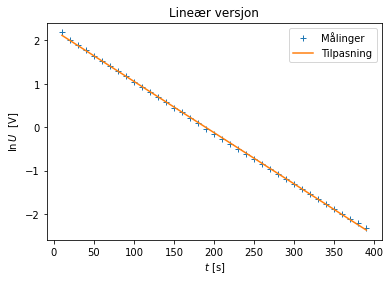

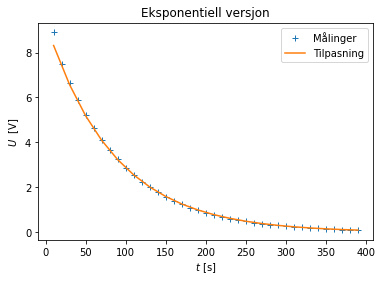

In [55]:
R = 0         

# Lineær regresjon
a = linregress(t, np.log(U)).slope
b = linregress(t, np.log(U)).intercept
t_reg = np.linspace(min(t), max(t), 20)

# Plotter logaritmen av data og lineær regresjonen av dataen
plt.plot(t, np.log(U), "+", label="Målinger")
plt.plot(t_reg, a*t_reg + b, label="Tilpasning")
plt.title("Lineær versjon")
plt.xlabel("$t$ [s]")
plt.ylabel("$\ln U$  [V]")
plt.legend()
plt.show()

# Plotter data (eksponesiell) og eksponensiell regresjonen av dataen
plt.plot(t, U, "+", label="Målinger")
plt.plot(t_reg, np.exp(b)*np.exp(a*t_reg), label="Tilpasning")
plt.title("Eksponentiell versjon")
plt.xlabel("$t$ [s]")
plt.ylabel("$U$  [V]")
plt.legend()

# Beregner den indre motstanden:
R = -1/(a*C)

In [56]:
print(R)
print(f"Motstand R = {R:.2f} Ohm")  # Velg et passende antall desimaler!

10198259.277355688
Motstand R = 10198259.28 Ohm


## Oppgaver 2.1.1 (før lab) og 2.2.1 (under lab)

I cellen under finner du en vektor $I$ og en vektor $U$, som er dummy-verdier for strømmen gjennom og spenningen over amperemeteret som vi skal måle på laben. Bruk disse verdiene til å lage en lineær tilpasning, og til å finne en dummy-verdi for den indre motstanden i amperemeteret, $R_{\mathrm{a}}$. Lag et plot som inneholder både verdiene av $I$ og $U$ samt den tilpassede kurven (noe liknende som figuren under).  

Når du er på laben (og gjør oppg. 2.2.1) skal alt du trenger å gjøre i notebooken være å sette inn de målte verdiene for strøm og spenning i vektorene $I$ og $U$.

<img src="https://www.mn.uio.no/fysikk/personer/vit/gertwk/eksempelgraf_2.png" alt="Målinger og lineær tilpasning" width="400">


In [17]:
I = np.array([17.2, 12.4, 8.74, 7.30, 5.86])    # Ampere
U2 = np.array([230, 165, 117, 97.4, 78.1])      # Volt      # Skriver U2, for å skille vektoren fra U i oppgave 1

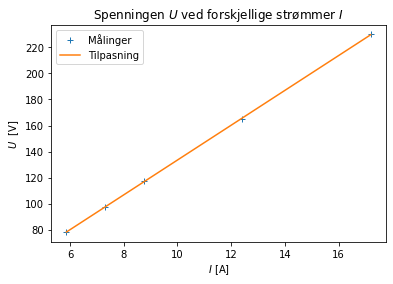

In [18]:
Ra = 0

a = linregress(I, U2).slope
b = linregress(I, U2).intercept
I_reg = np.linspace(min(I), max(I), 20)

# Plotter
plt.plot(I, U2, "+", label="Målinger")
plt.plot(I_reg, a*I_reg + b, label="Tilpasning")
plt.title("Spenningen $U$ ved forskjellige strømmer $I$")
plt.xlabel("$I$ [A]")
plt.ylabel("$U$  [V]")
plt.legend()
plt.show()

Ra = a

In [19]:
print(Ra)
print(f"Motstand Ra = {Ra:.2f} Ohm")  # Velg et passende antall desimaler!

13.370848122817653
Motstand Ra = 13.37 Ohm


## Oppgaver 3.1.1 (før lab)

Den totale spenningsforskjellen i kretsen får et positivt bidrag fra emfen $U_1 = \varepsilon$ og et negativt bidrag fra den indre resistansen $r$ på formen $U_2 = -rI$ hvor $I$ er strømmen som går gjennom kretsen. Den totale spenningsforskjellen kan dermed skrives som:
<br/><br/>
\begin{align*}
U &= U_1 + U_2 \\[2mm]
U &= \varepsilon - rI \\[2mm]
U &= -rI + \varepsilon
\end{align*}

Dette har formen $y = ax + b$, hvor variablene er $y = U$ og $x = I$ med stigningstall $a = -r$ og skjæringspunkt $b = \varepsilon$. Hvis vi plotter $U$ mot $I$ vil vi dermed finne den indre resistansen som det negative stigningstallet $r = -a$ og emfen som skjæringspunktet $\varepsilon = b$.

## Oppgaver 3.1.2 (før lab) og 3.2.2 (under lab)

I cellen under finner dere to lister med spenninger $U$ og motstander $R$, som dere kommer til å måle under forsøket. Verdiene som er der nå er "falske".

Man kan bruke disse verdiene for å lage en liste med verdier for strømmen $I$. Når dere har strømmen kan dere bestemme indre resistans $r$ og emf $\epsilon$ ved hjelp av en linærtilpasning, slik dere gjorde i de to tidligere oppgavene. Mer om dette står forklart i labteksten.

<img src="https://www.mn.uio.no/fysikk/personer/vit/gertwk/eksempelgraf_3.png" alt="Lineær tilpasning av spenning målt mot strøm for et peltier-element med en indre resistans" width="400"/> 

Ved å lage en linærtilpasning skal dere få en graf (gitt dere bruker samme dummy-verdier) som ligner den over, og bruke denne til å anslå verdier for emf, og indre motstand. 

In [28]:
U3 = np.array([142, 189, 261, 335, 472])/1000   # Volt
R3 = np.array([1, 1.5, 2.5, 4, 10])             # Ohm

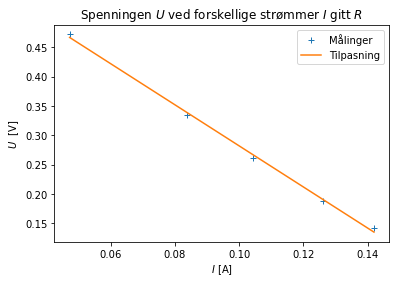

In [29]:
I3 = U3 / R3        # Strømmen I, som dere må finne.    
r = 0               # Indre motstand som dere må finne.
emf = 0             # Emf i Peltier-element som dere må finne.

a = linregress(I3, U3).slope
b = linregress(I3, U3).intercept
I_reg = np.linspace(min(I3), max(I3), 20)

# Plotter
plt.plot(I3, U3, "+", label="Målinger")
plt.plot(I_reg, a*I_reg + b, label="Tilpasning")
plt.title("Spenningen $U$ ved forskellige strømmer $I$ gitt $R$")
plt.xlabel("$I$ [A]")
plt.ylabel("$U$  [V]")
plt.legend()
plt.show()

r = -a
emf = b

In [30]:
# Skriv ut resultatene for Emf og indre resistans.
# Bruk et passende antall desimaler, og riktige enheter!
print(f"Indre resistans er r = {r:.2f} Ohm")
print(f"Emfen er emf = {emf:.2f} Volt")

Indre resistans er r = 3.50 Ohm
Emfen er emf = 0.63 Volt


Når dere kommer på lab, vil alt dere trenger å gjøre være å sette inn målt verdi for spenning $U$ over motstanden, samt notere ned størrelsen på motstanden $R$ som ble brukt direkte inn i notebooken og produsere resultater! 

## Oppgave 4.2.1 (på lab)

In [53]:
print("Kobber stav:")
I1 = np.array([2.00, 1.7497, 1.5002, 1.2503, 1.0008])   # A
U1 = np.array([0.064, 0.055, 0.047, 0.039, 0.031])      # mV
R1 = U1/I1
#print(R1)
print(f"{np.mean(R1):.4f} mOhm")

I2 = np.array([2.0040, 1.7501, 1.4996, 1.2501, 1.0041])
U2 = np.array([2.821, 2.407, 2.035, 1.683, 1.340])
R2 = U2/I2
#print(R2)
print(f"{np.mean(R2):.4f} mOhm")

Kobber stav:
0.0314 mOhm
1.3642 mOhm


In [52]:
print("Aluminium stav:")
I1 = np.array([2.0024, 1.7486, 1.5044, 1.2575, 1.0099])   # A
U1 = np.array([0.0112, 0.098, 0.083, 0.070, 0.056])      # mV
R1 = U1/I1
#print(R1)
print(f"{np.mean(R1):.4f} mOhm")

I2 = np.array([2.0028, 1.7524, 1.5066, 1.2597, 1.0030])
U2 = np.array([20.93, 18.07, 15.38, 12.70, 14.00])
R2 = U2/I2
#print(R2)
print(f"{np.mean(R2):.4f} mOhm")


Aluminium stav:
0.0456 mOhm
11.0020 mOhm


Vi ser at motstanden ble mye større når vi målte med to punkter i steden for fire punkter for både aluminium og kobber staven. Motstanden i aluminumet økte mer enn det for kobberet. Grunnen til denne økningen kan komme av at overflate arealt er mye lavere ved topunkt måling sammenliknet med firepunkt.

## Oppgave 5.1 (før lab)

Setter inn $\Phi = NAB\cos(\theta) = NAb\cos(\omega t)$ i derivatet $\varepsilon = - \frac{d\Phi}{dt}$ og deriverer:
<br/><br/>
\begin{align*}
\varepsilon &= -\frac{d}{dt}(NAb\cos(\omega t)) \\[3mm]
            &= -NAB\frac{d}{dt}(\omega t)\frac{d}{dt}(\cos((\omega t))) \qquad\qquad \text{(Kjerneregelen)}\\[5mm] 
            &= NAB\omega\sin(\omega t) \\
\end{align*}
<br/>
Dette uttrykket har størst verdi ved amplitudene ($\sin(\omega t) = 1$), som betyr at amplituden $X$ kan skrives som:
<br/><br/>
\begin{equation*}
X = NAB\omega
\end{equation*}

Løser vi dette for B får vi:
<br/><br/>
\begin{equation*}
B = \frac{X}{NA\omega}
\end{equation*}

## Oppgave 5.2.1 og 5.2.2 (på lab)

Tilnærmingen av sinus kurven ga oss en amplitude på $X = 4.73 \cdot 10^{-3}$ og $\omega = 4.11$. Med $NA = 30$ så fikk vi magnetfeltet $B = 38 \mu$ Tesla. 

Vi kan benytte dette instrumentet til å finne jordas magnetfelt ved å rotere på instrumentet og se hvor vi får størst utslag.